## Importing the libraries

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,f1_score

## Importing the dataset

In [157]:
dataset = pd.read_csv('Data (1).csv')
dataset

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


## Removing Missing Values 

In [221]:
dataset = dataset.dropna()

In [222]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

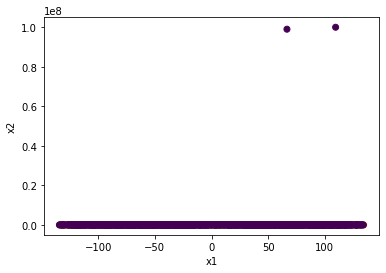

In [223]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

As we can see, there are 2 outliers present with respect to 'x2' column represented on the Y-axis on the above graph. Hence we remove the outlier by removing the maximum values of X w.r.t 'x2'.


## Removing Outliers

In [224]:
#Removing Outlier 1
i = np.argmax(X[:,1])
X = np.delete(X,i,axis=0)
y = np.delete(y,i,axis=0)
X.shape,y.shape

((2218, 2), (2218,))

In [225]:
#Removing Outlier 2
i = np.argmax(X[:,1])
X = np.delete(X,i,axis=0)
y = np.delete(y,i,axis=0)
X.shape,y.shape

((2217, 2), (2217,))

# Checking for more outliers 

In [226]:
max(X[:,1])
i = np.argmax(X[:,1])
X[i,1]

134.9297479

## Splitting the dataset

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [229]:
print(X_train)

[[ 44.71812413 -71.30741155]
 [-90.3666687   81.        ]
 [ 50.77801973 -69.43654428]
 ...
 [-19.5446604  -21.93809231]
 [ 71.6333313   73.        ]
 [-29.55967841 -38.11977255]]


## Feature Scaling

In [232]:
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:,:])
X_test[:, :] = sc.transform(X_test[:, :])

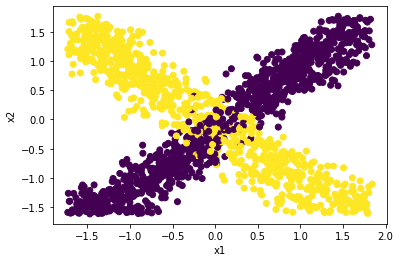

In [234]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Logistic Regression

In [238]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()  
classifier1.fit(X_train, y_train)

LogisticRegression()

In [239]:
y_pred_lr = classifier1.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
f1_score_lr

0.5563380281690141

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


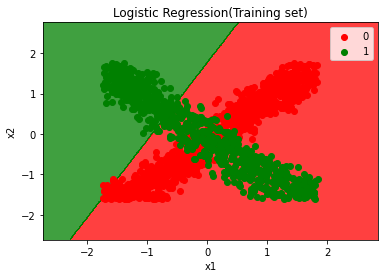

In [240]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression(Training set)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## Linear SVC

In [242]:
classifier2 = SVC(kernel = 'linear')  
classifier2.fit(X_train, y_train)
y_pred_svcl = classifier2.predict(X_test)
f1_score_svcl = f1_score(y_test, y_pred_svcl)
f1_score_svcl

0.5531914893617021

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


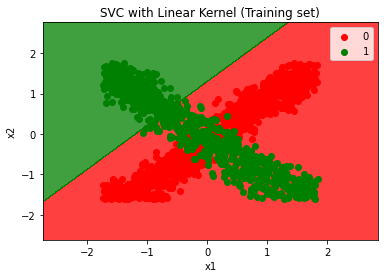

In [244]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVC with Linear Kernel (Training set)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## KNeighborsClassifier

In [264]:
from sklearn.neighbors import KNeighborsClassifier
classifier5 = KNeighborsClassifier(n_neighbors = 5)
classifier5.fit(X_train, y_train)

KNeighborsClassifier()

In [265]:
from sklearn.metrics import confusion_matrix,f1_score
y_pt =  classifier5.predict(X_train)
cm = confusion_matrix(y_train, y_pt)
f11 = f1_score(y_train, y_pt)
f11

0.9600000000000001

In [266]:
y_pred_knn = classifier5.predict(X_test)

In [267]:
from sklearn.metrics import confusion_matrix,f1_score
cm = confusion_matrix(y_test, y_pred_knn)
f1= f1_score(y_test, y_pred_knn)
f1

0.9400479616306955

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


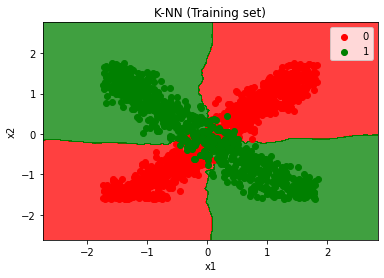

In [257]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier5.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


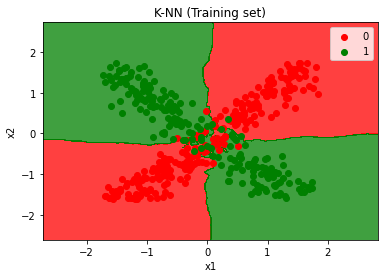

In [268]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier5.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## SVM with RBF kernel

In [280]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'rbf')  
classifier3.fit(X_train, y_train)

SVC()

In [276]:
y_pred_svc = classifier3.predict(X_test)

In [277]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
f1_svc

0.9361702127659575

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


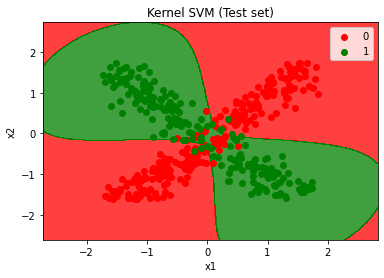

In [278]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## Decision Tree 

In [205]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [207]:
y_pred_dt = clf.predict(X_test)
f1_score_dt = f1_score(y_test, y_pred_dt)

In [208]:
f1_score_dt

0.9047619047619047

We shall choose KNN and SVM with Rbf kernel as the data is non linear and suits the algorithm. We shall employ grid search with rbf kernel henceforth to improve the results.